## ## Mall Customers
### notebook
#### 1. Acquire data from mall_customers.customers in mysql database.

In [19]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import env
import os
import acquire
import wrangle_mall as wm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# from our acquire.py:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

In [4]:
mall_df = get_mallcustomer_data()

In [5]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


## 2. Summarize data (include distributions and descriptive statistics).

In [6]:
wm.summarize(mall_df)



Dataframe head: 
|   customer_id | gender   |   age |   annual_income |   spending_score |
|--------------:|:---------|------:|----------------:|-----------------:|
|             1 | Male     |    19 |              15 |               39 |
|             2 | Male     |    21 |              15 |               81 |
|             3 | Female   |    20 |              16 |                6 |


Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None


Dataframe Description: 
|       |     age |   annual_income |   spending_score |
|:------|--------:|----------------:|-----------------:|
| count | 200     |        20

NameError: name 'pd' is not defined

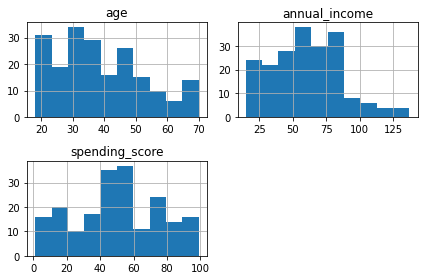

In [7]:
mall_df.hist()
plt.tight_layout()
plt.show()

## 3. Detect outliers using IQR.

In [8]:
def outlier_function(df, cols, k):
# function to detect and handle oulier using IQR rule
    for col in df[cols]:
        q1 = df.annual_income.quantile(0.25)
        q3 = df.annual_income.quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

In [9]:
mall_df = outlier_function(mall_df, ['age', 'spending_score', 'annual_income'], 1.5)

In [10]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 1 to 198
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          198 non-null    object
 1   age             198 non-null    int64 
 2   annual_income   198 non-null    int64 
 3   spending_score  198 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.7+ KB


## 4. Split data (train, validate, and test split).

In [12]:
# split df into test (20%) and train_validate (80%)
train_validate, test = train_test_split(mall_df, test_size=.2, random_state=123)

# split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [13]:
train.shape, validate.shape, test.shape

((110, 4), (48, 4), (40, 4))

## # 5. Encode categorical columns using a one hot encoder (pd.get_dummies).

In [14]:
mall_df.dtypes

gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

In [15]:
dummy_df = pd.get_dummies(mall_df.gender, drop_first=True) # the only catagorical column
mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns=['gender'])

## 6. Handles missing values.

In [16]:
#no missing values
mall_df.isna().sum()

age               0
annual_income     0
spending_score    0
Male              0
dtype: int64

## 7. Scaling

In [17]:
def min_max_scaler(train, valid, test):
    '''
    Uses the train & test datasets created by the split_my_data function
    Returns 3 items: mm_scaler, train_scaled_mm, test_scaled_mm
    This is a linear transformation. Values will lie between 0 and 1
    '''
    num_vars = list(train.select_dtypes('number').columns) # taking in columns that are only numerical
    scaler = MinMaxScaler()
    train[num_vars] = scaler.fit_transform(train[num_vars])
    valid[num_vars] = scaler.transform(valid[num_vars])
    test[num_vars] = scaler.transform(test[num_vars])
    return scaler, train, valid, test

In [21]:
scaler, train, val, test = wm.wrangle_mall_df()

NameError: name 'get_db_url' is not defined

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 46 to 59
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          110 non-null    object
 1   age             110 non-null    int64 
 2   annual_income   110 non-null    int64 
 3   spending_score  110 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.3+ KB


In [23]:
train.head()

,gender,age,annual_income,spending_score
customer_id,,,,
46,Female,24,39,65
40,Female,20,37,75
12,Female,35,19,99
172,Male,28,87,75
96,Male,24,60,52


In [25]:
validate.head()

,gender,age,annual_income,spending_score
customer_id,,,,
177,Male,58,88,15
150,Male,34,78,90
156,Female,27,78,89
118,Female,49,65,59
69,Male,19,48,59


In [26]:
test.head()

,gender,age,annual_income,spending_score
customer_id,,,,
157,Male,37,78,1
27,Female,45,28,32
63,Female,67,47,52
32,Female,21,30,73
21,Male,35,24,35
